## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=512,activation='relu')(input_layer)
    x=keras.layers.Dense(units=256,activation='relu')(x)
    x=keras.layers.Dense(units=128,activation='relu')(x)
    out=keras.layers.Dense(units=10,activation='softmax')(x)
    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

model = build_mlp()

In [0]:
"""
Compile 模型
"""
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.9349 - accuracy: 0.3038 - val_loss: 1.7447 - val_accuracy: 0.3831
Epoch 2/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.7132 - accuracy: 0.3856 - val_loss: 1.6771 - val_accuracy: 0.3982
Epoch 3/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.6148 - accuracy: 0.4202 - val_loss: 1.6107 - val_accuracy: 0.4228
Epoch 4/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.5500 - accuracy: 0.4468 - val_loss: 1.5655 - val_accuracy: 0.4490
Epoch 5/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.5001 - accuracy: 0.4650 - val_loss: 1.4993 - val_accuracy: 0.4634
Epoch 6/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.4641 - accuracy: 0.4783 - val_loss: 1.4700 - val_accuracy: 0.4781
Epoch 7/500
50000/50000 [=========================

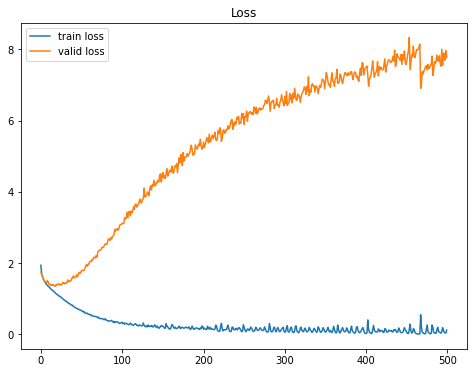

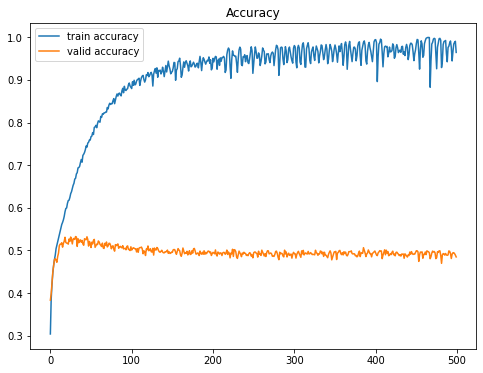

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [0]:
model2 = build_mlp()
model2.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 185us/step - loss: 2.0665 - accuracy: 0.2643 - val_loss: 1.9698 - val_accuracy: 0.2915
Epoch 2/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.8762 - accuracy: 0.3374 - val_loss: 1.8443 - val_accuracy: 0.3479
Epoch 3/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.8070 - accuracy: 0.3618 - val_loss: 1.8268 - val_accuracy: 0.3420
Epoch 4/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.7601 - accuracy: 0.3802 - val_loss: 1.7490 - val_accuracy: 0.3799
Epoch 5/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.7287 - accuracy: 0.3894 - val_loss: 1.7707 - val_accuracy: 0.3593
Epoch 6/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.6943 - accuracy: 0.4033 - val_loss: 1.7086 - val_accuracy: 0.3962
Epoch 7/500
50000/50000 [==============================

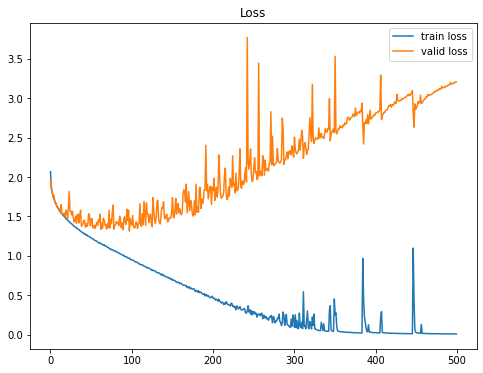

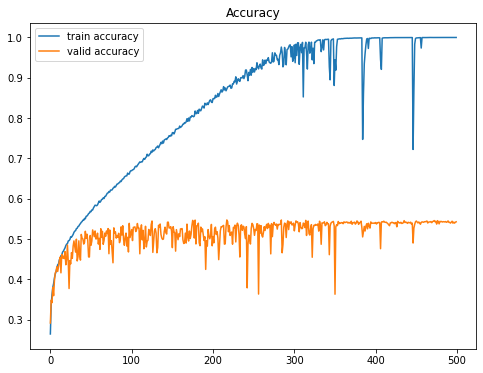

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()